In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [9]:
# help(sns.distplot)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

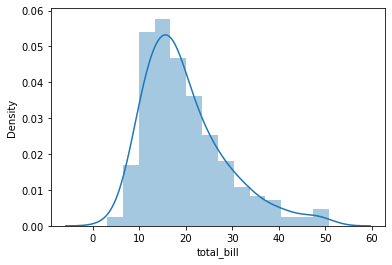

In [10]:
sns.distplot(tips['total_bill'])

<AxesSubplot:xlabel='total_bill'>

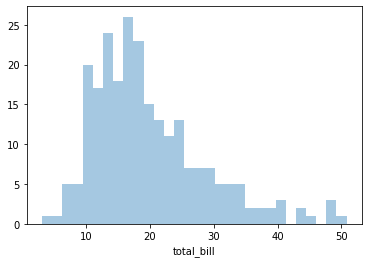

In [14]:
sns.distplot(tips['total_bill'], kde=False, bins= 30)

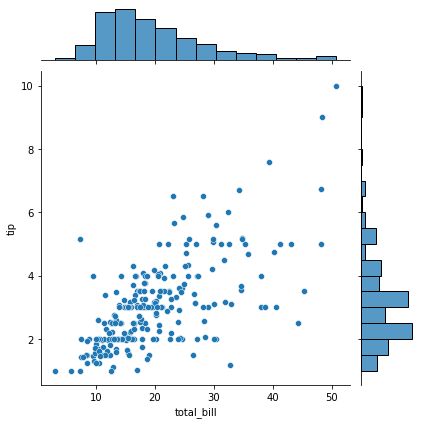

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips)

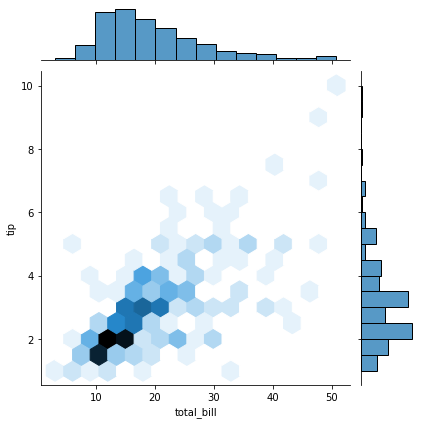

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

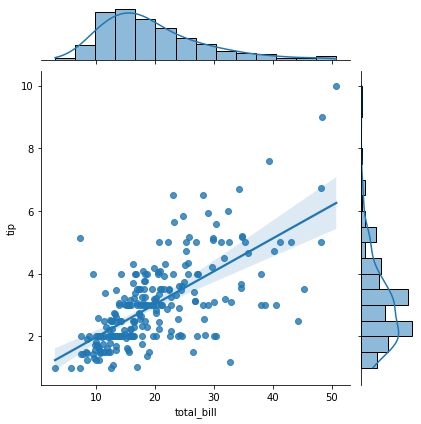

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

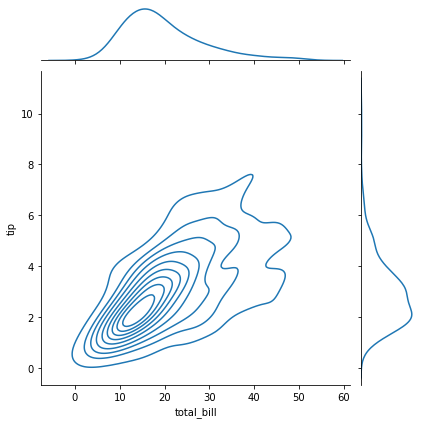

In [18]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

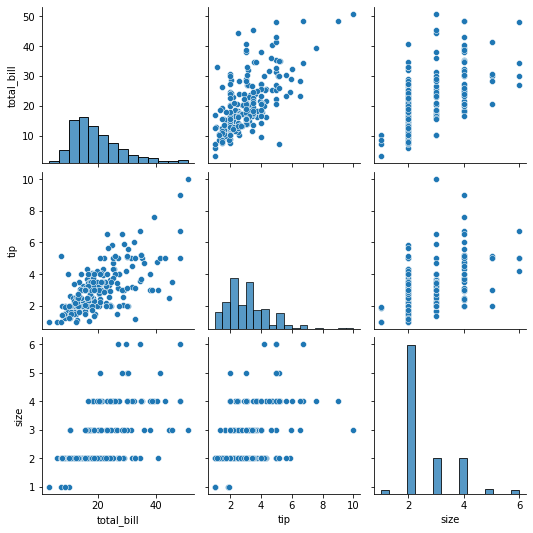

In [21]:
sns.pairplot(tips)

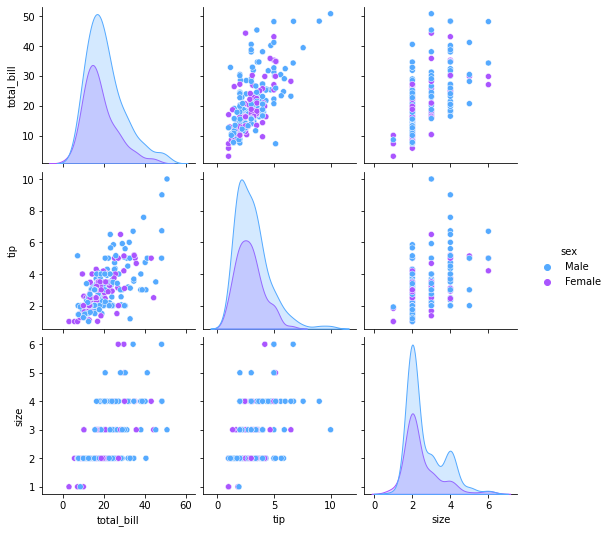

In [23]:
sns.pairplot(tips, hue='sex', palette='cool')

<AxesSubplot:xlabel='total_bill'>

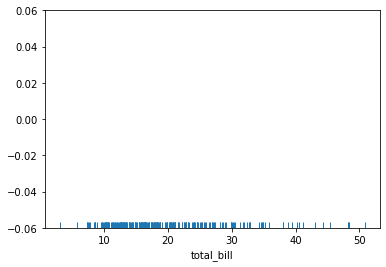

In [25]:
sns.rugplot(tips['total_bill']) 
# Basically this is what kde is built out of but it doesn't have that great usefulness

(0.0, 1.0)

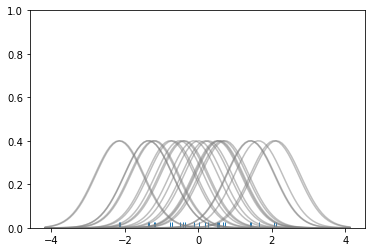

In [26]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

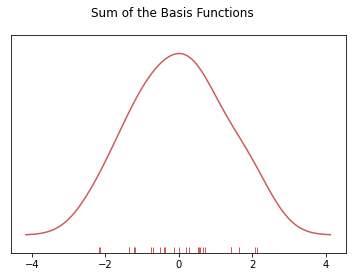

In [27]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

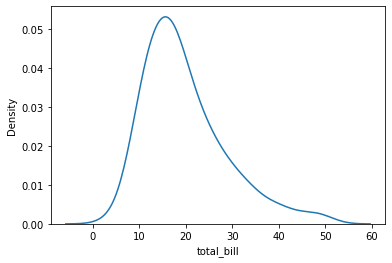

In [29]:
sns.kdeplot(tips['total_bill'])

# Categorical Plots

In [33]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

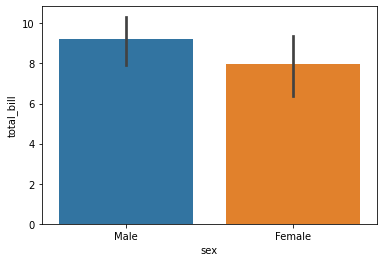

In [34]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

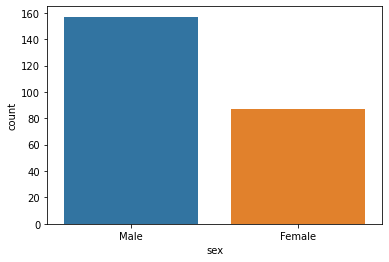

In [35]:
sns.countplot(x='sex', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

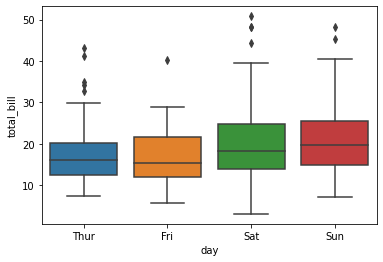

In [36]:
sns.boxplot(x='day',y='total_bill',data=tips)
# Shows the core tiles of the data.
# The whiskers extend to show the rest of the distribution 
# Outside the whiskers tehere are the outliiers

<AxesSubplot:xlabel='day', ylabel='total_bill'>

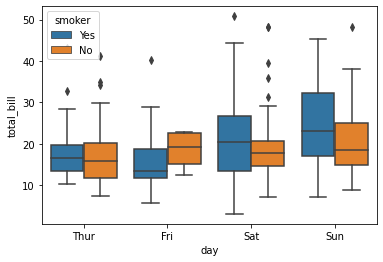

In [37]:
sns.boxplot(x='day',y='total_bill',data=tips, hue ='smoker')


<AxesSubplot:xlabel='day', ylabel='total_bill'>

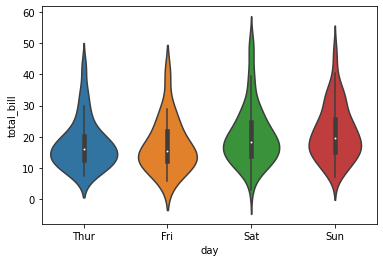

In [38]:
sns.violinplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

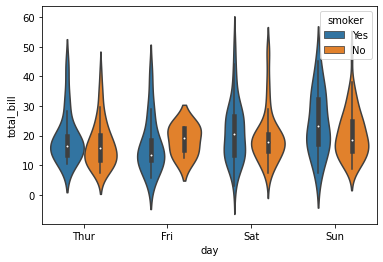

In [39]:
sns.violinplot(x='day',y='total_bill',data=tips, hue='smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

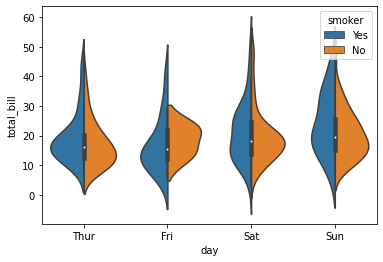

In [40]:
sns.violinplot(x='day',y='total_bill',data=tips, hue='smoker', split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

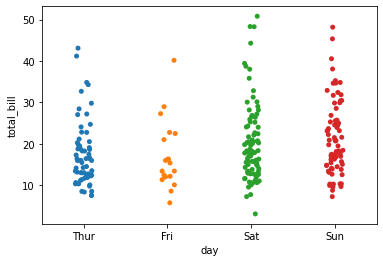

In [41]:
sns.stripplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

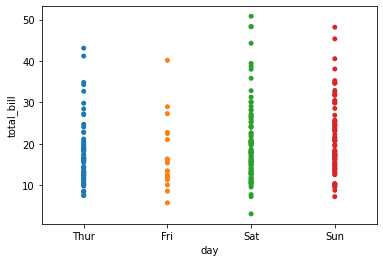

In [42]:
sns.stripplot(x='day',y='total_bill',data=tips, jitter=False)

/home/acr/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

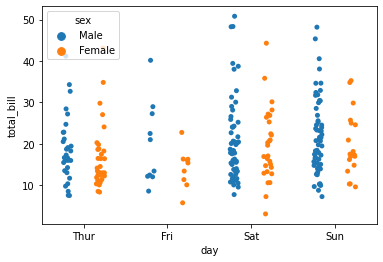

In [43]:
sns.stripplot(x='day',y='total_bill',data=tips, hue='sex', split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

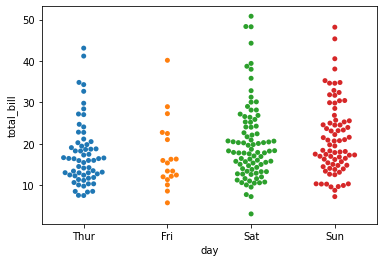

In [44]:
sns.swarmplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

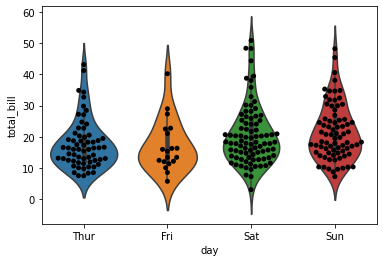

In [46]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips, color='black')

/home/acr/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


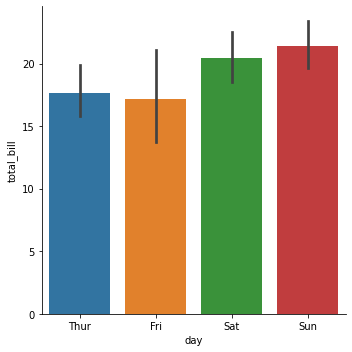

In [48]:
sns.factorplot(x='day',y='total_bill',data=tips, kind='bar')

/home/acr/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


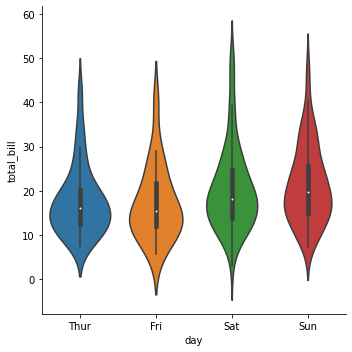

In [49]:
sns.factorplot(x='day',y='total_bill',data=tips, kind='violin')

# Matrix Plots

In [53]:
flights= sns.load_dataset('flights')
flights

year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]

In [55]:
tc=tips.corr()
tc

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

<AxesSubplot:>

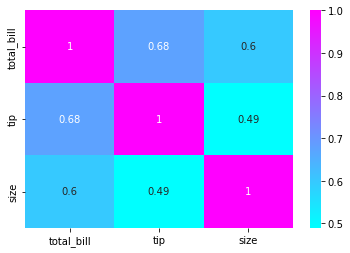

In [58]:
sns.heatmap(tc, annot=True, cmap='cool')

In [60]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')
fp

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   310   362   390
Dec     118   140   166   194   201   229   278   306   336   337   405   432

<AxesSubplot:xlabel='year', ylabel='month'>

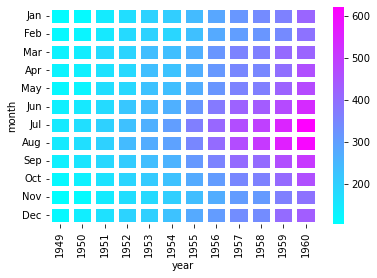

In [63]:
sns.heatmap(fp,cmap='cool', linecolor='white',linewidths=5)

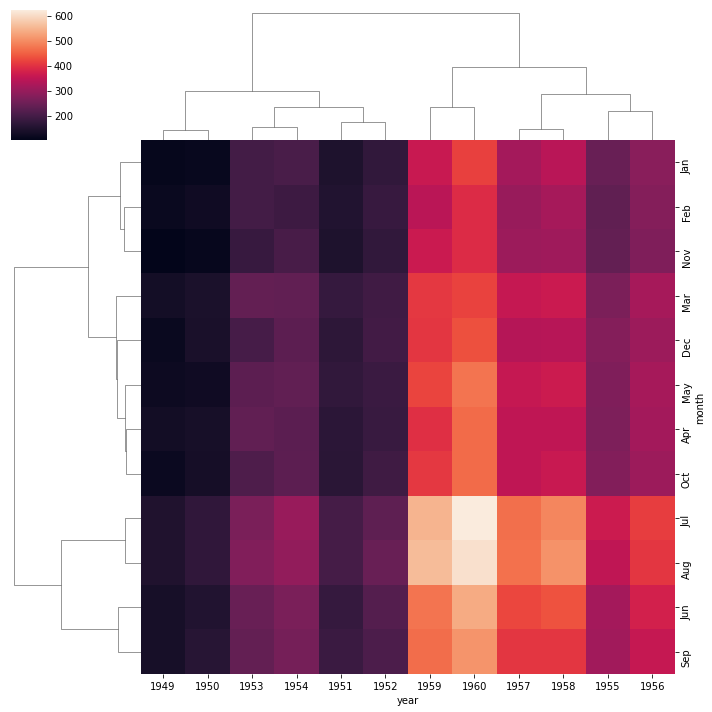

In [65]:
sns.clustermap(fp) # Clusters info so that similar rows and columns are near each other

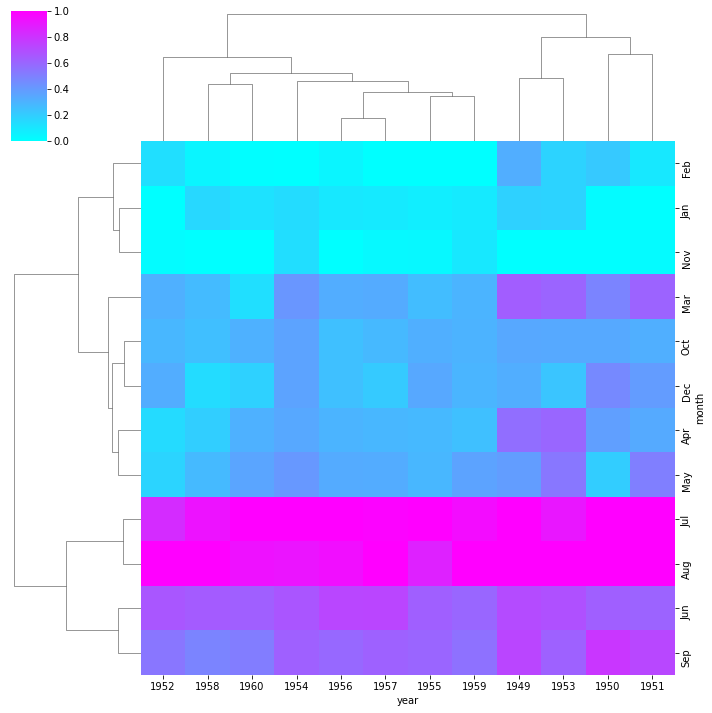

In [67]:
sns.clustermap(fp, cmap='cool', standard_scale=1)

# Grids

In [69]:
iris=sns.load_dataset('iris')
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [70]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

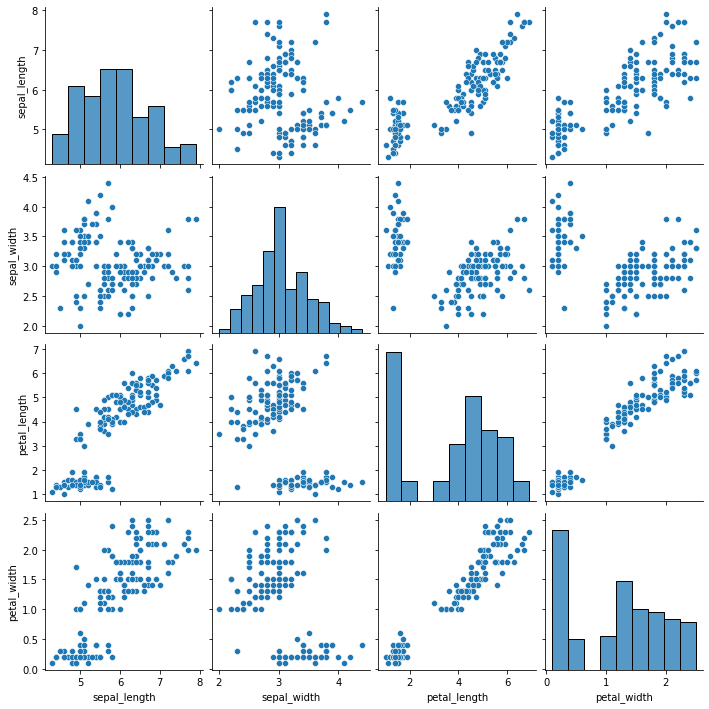

In [71]:
sns.pairplot(iris)

/home/acr/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/acr/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/acr/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

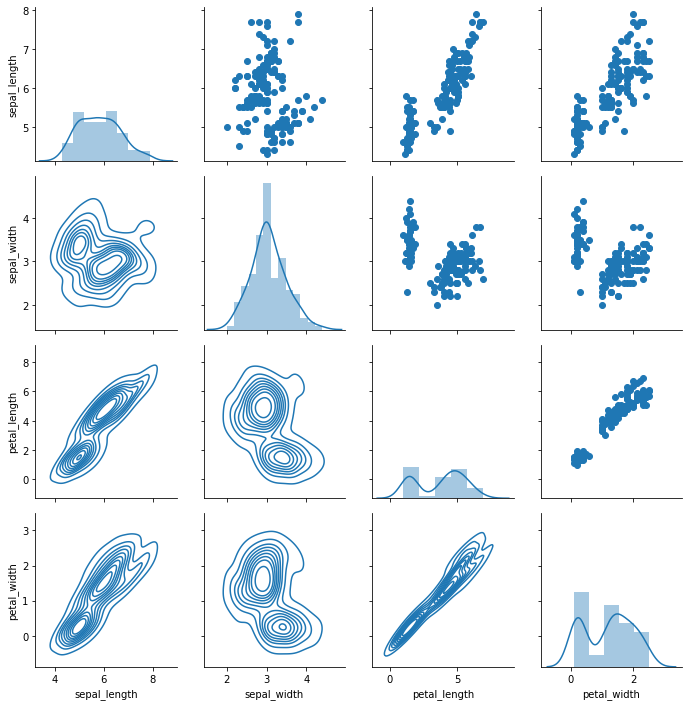

In [75]:
g=sns.PairGrid(iris)

# g.map(plt.scatter)
g.map_diag(sns.distplot) # maps exactly what is presented in the diagonal plots
g.map_upper(plt.scatter) # the plots above the diagonal
g.map_lower(sns.kdeplot) # and the plots under the diagonal

/home/acr/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/acr/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/acr/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

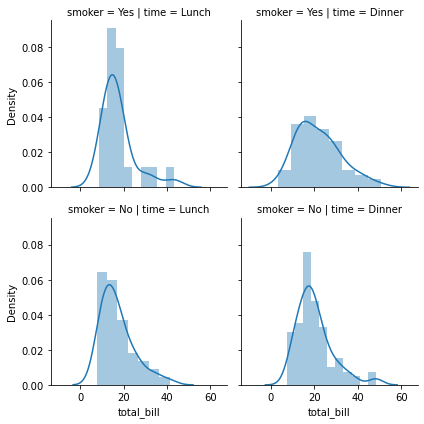

In [77]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot, 'total_bill')

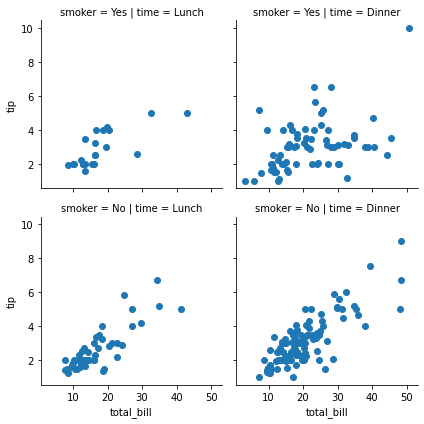

In [78]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter, 'total_bill','tip')

# Regression Plots

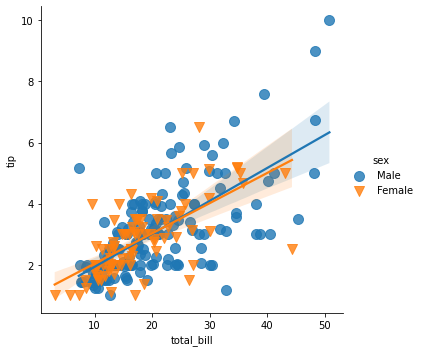

In [83]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', markers=['o','v'],
          scatter_kws={'s':100})

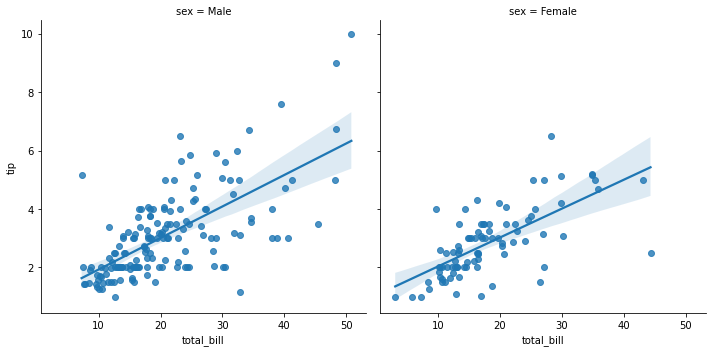

In [85]:
sns.lmplot(x='total_bill',y='tip',data=tips, col='sex')

In [88]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

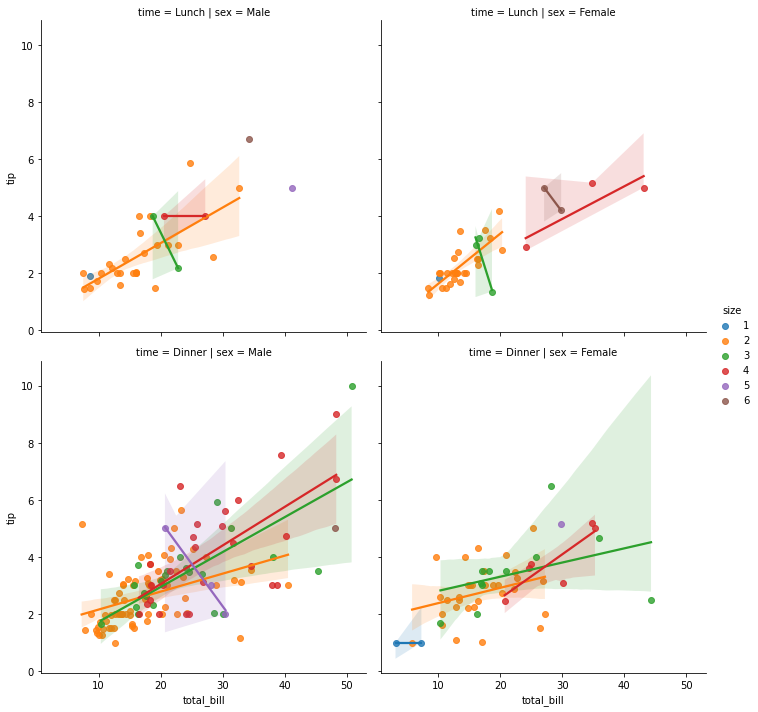

In [89]:
sns.lmplot(x='total_bill',y='tip',data=tips, col='sex', row='time', hue='size')

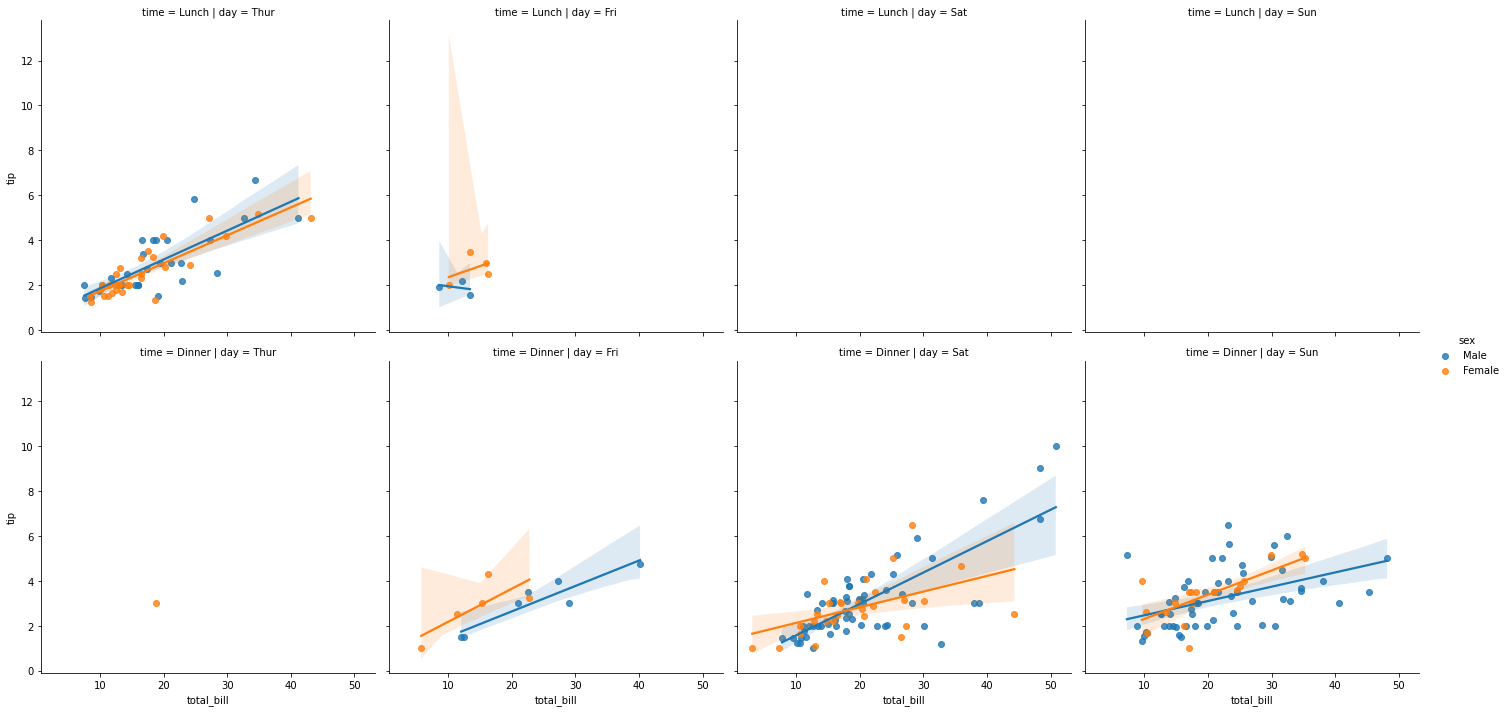

In [90]:
sns.lmplot(x='total_bill',y='tip',data=tips, col='day', row='time', hue='sex')

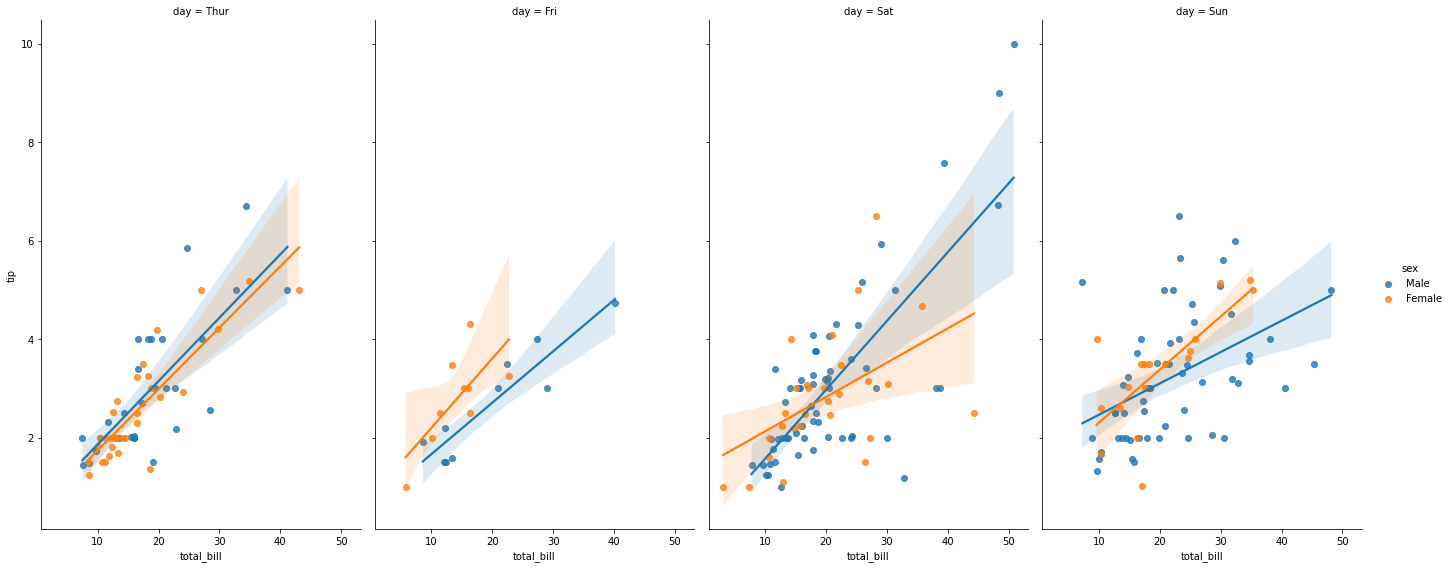

In [94]:
sns.lmplot(x='total_bill',y='tip',data=tips, col='day', hue='sex', aspect=0.6, height=8)

# Style and color

<AxesSubplot:xlabel='sex', ylabel='count'>

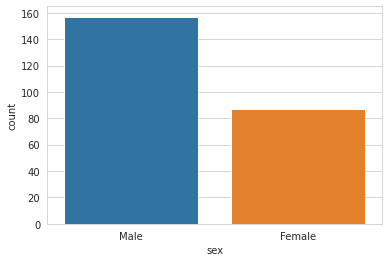

In [96]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

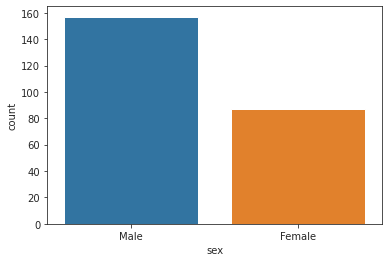

In [97]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

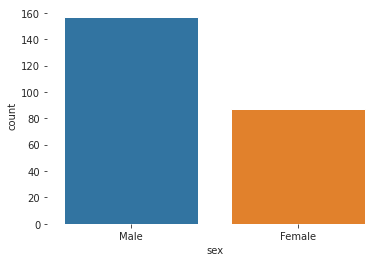

In [99]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(left=True, bottom=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

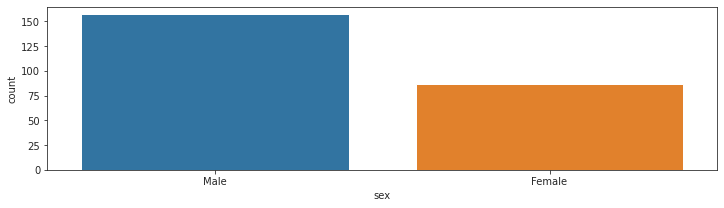

In [100]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

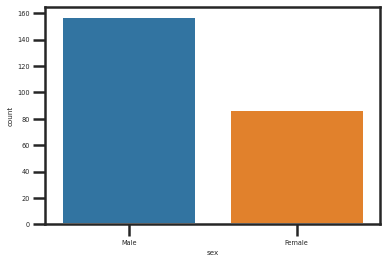

In [104]:
sns.set_context('poster', font_scale=0.3)
sns.countplot(x='sex',data=tips)

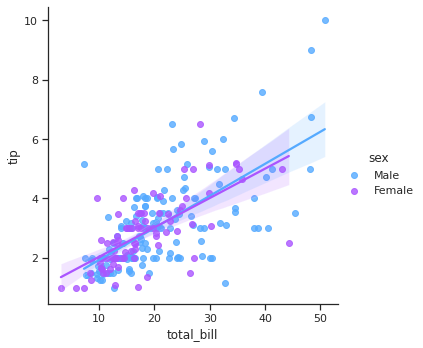

In [109]:
sns.set_context('notebook')
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex', palette='cool')